<a href="https://colab.research.google.com/github/ruchibhadauria/machine-learning/blob/master/HappinessReport/indiahappinessreport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this notebook I am only trying to visualize, report and compare the happiness index and its score components on India and its surrounding neighbors that is South Asian Country. In this notebook I did not analyze the causes of the score in detail.

# Context
The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

# Content
The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

# Key Features in 'world happiness report':
**Life Ladder**: Imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you.

**Log GDP per capita**: At its most basic interpretation, per capita GDP shows how much economic production value can be attributed to each individual citizen. Alternatively, this translates to a measure of national wealth since GDP market value per person also readily serves as a prosperity measure.

**Social support**: Social support is defined in terms of social network characteristics such as assistance from family, friends, neighbours and other community members.

**Healthy life expectancy at birth**: Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year

**Freedom to make life choices**: Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.

**Generosity**: Generosity is the virtue of being liberal in giving, often as gifts.

**Perceptions of corruption**: Corruption is a form of dishonesty or criminal offense undertaken by a person or organization entrusted with a position of authority, to acquire illicit benefit

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('RdYlGn_r')
import warnings
warnings.filterwarnings('ignore')

In [2]:
happiness = pd.read_csv('world-happiness-report-2021.csv')

In [3]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [4]:
happiness_report = happiness.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Ladder score in Dystopia'], axis = 1)

There are certain columns that we drop:

- The explained columns are dropped as it's simply a demonstration of the 6 main factors.
- Standard error of ladder score as well as upper whisker and lower whisker are dropped as well.
- Ladder score in Dystopia has a value of 2.43 for each country but is already reflected in Dystopia + residual.

In [5]:
happiness_report.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430329
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.537645
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,0.648000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.138000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.509000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.794000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,3.482000


In [6]:
happiness_report.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.868
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.839
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.967
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.798


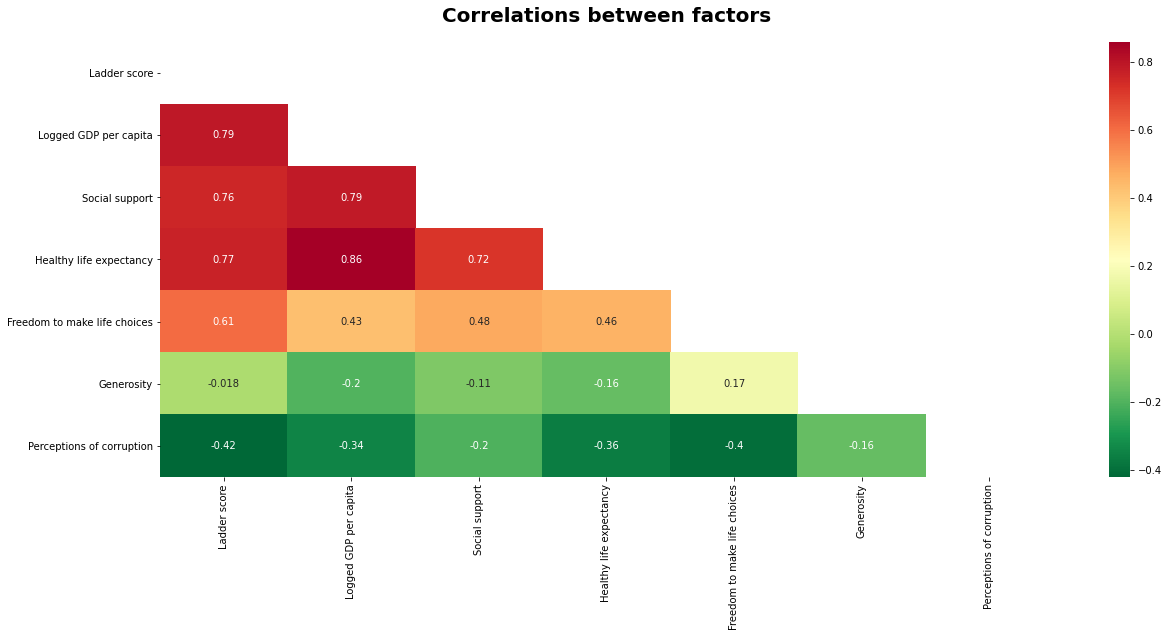

In [7]:
cols = happiness_report[['Ladder score', 'Logged GDP per capita','Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

plt.figure(figsize=(20, 8))
sns.heatmap(cols.corr(), annot = True, cmap='RdYlGn_r', mask=np.triu(np.ones_like(cols.corr())));
plt.title('Correlations between factors', fontsize=20, fontweight='bold', pad=20);

- It would seem that there is high correlation between ladder score and logged GDP per capita, social support and healthy life expectancy. Social support and healthy life expectancy are highly correlated to logged GDP per capita, as well as healthy life expectancy and social support have high correlation. The thing which is shocking is the very weak correlation between generosity and ladder score.
- It is not surprising that there is a correlation between GDP per capita and healthy life expectancy, as it could be linked to things such as better healthcare infrastructure and better systems to improve quality of life like water cleanliness, etc.

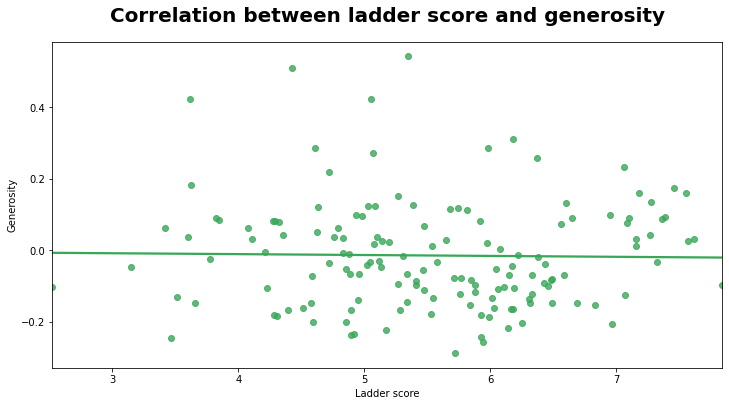

In [8]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Ladder score', y='Generosity', data=happiness_report, ci=None);
plt.title('Correlation between ladder score and generosity', fontsize=20, fontweight='bold', pad=20);

We can tell there are quite a few outliers with high generosity values and rather low ladder scores, and vice versa. Since the data is so varied, there is little to no correlation regarding generosity of countries and the ladder score.

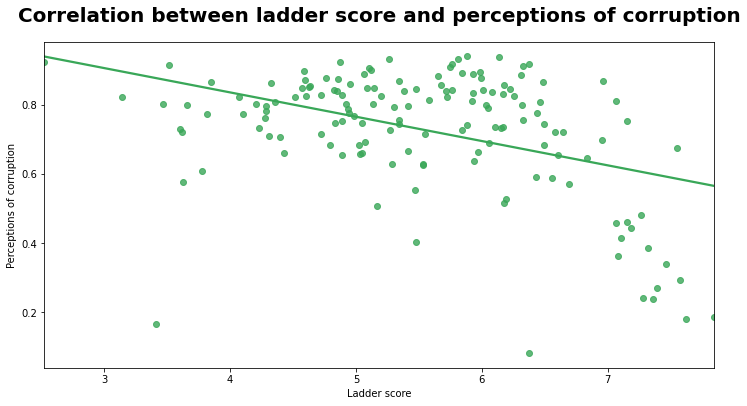

In [9]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Ladder score', y='Perceptions of corruption', data=happiness_report, ci=None);
plt.title('Correlation between ladder score and perceptions of corruption', fontsize=20, fontweight='bold', pad=20);

We can see that perception of corruption and ladder score are weakly correlated. Majority of data points have high perception of corruption.

# India from 2006 to 2021

In [10]:
happiness_report_older = pd.read_csv('world-happiness-report.csv')
india_1 = happiness_report_older[happiness_report_older['Country name'] == 'India'].reset_index(drop=True) 
india_1 = india_1.drop(['Positive affect','Negative affect'], axis = 1)
india_1 = india_1.fillna(0)

In [11]:
happiness_report['year'] = 2021
india_2 = happiness_report[happiness_report['Country name'] == 'India']
india_2 = india_2.rename(columns = {'Ladder score':'Life Ladder',
                'Logged GDP per capita':'Log GDP per capita',
                'Healthy life expectancy':'Healthy life expectancy at birth'})

india_2 = india_2.drop(['Dystopia + residual', 'Regional indicator'], axis = 1)

In [12]:
india = pd.concat([india_1, india_2])
india.reset_index(drop=True, inplace=True)
india.rename(columns = {'year':'Year'}, inplace=True)
india

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,India,2006,5.348,8.145,0.707,55.720,0.774,0.000,0.855
1,India,2007,5.027,8.204,0.569,56.140,0.729,-0.051,0.862
2,India,2008,5.146,8.220,0.684,56.560,0.756,-0.072,0.891
3,India,2009,4.522,8.281,0.653,56.980,0.679,-0.026,0.895
4,India,2010,4.989,8.349,0.605,57.400,0.783,0.058,0.863
5,India,2011,4.635,8.387,0.553,57.700,0.838,-0.038,0.908
6,India,2012,4.720,8.428,0.511,58.000,0.609,0.067,0.830
7,India,2013,4.428,8.478,0.553,58.300,0.740,0.084,0.832
8,India,2014,4.424,8.538,0.621,58.600,0.809,-0.026,0.832
9,India,2015,4.342,8.604,0.610,58.900,0.777,-0.005,0.776


- Firstly, the titles for 2021 are changed to fit those of the original World Happiness Dataset.
- Secondly, certain things are cut off from the original dataset such as Positive affect and Negative affect
- The year is added to the 2021 dataset.
- Lastly, the two datasets are concatenated.

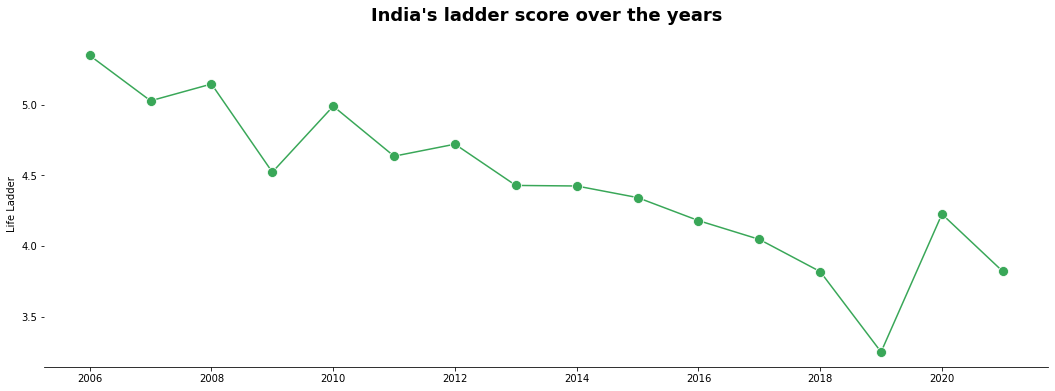

In [13]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Year', y='Life Ladder', data=india, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('India\'s ladder score over the years', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

There are certain peaks with regards to India's ladder score as seen in the years 2008, 2010, 2012 and 2020. There are also certain drops as seen in the years 2007, 2009, 2011 and an overall low in 2019. A continouse decrease can be seen from 2012 to 2019. The overall trend for the ladder score is decreasing. 


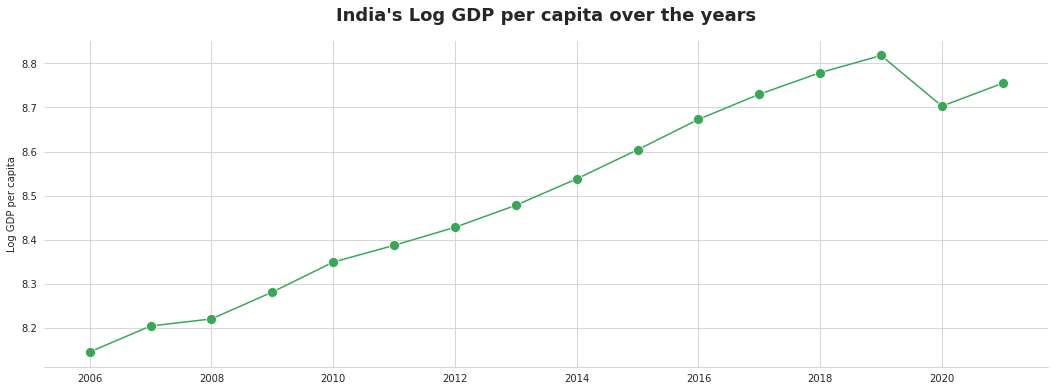

In [14]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Year', y='Log GDP per capita', data=india, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('India\'s Log GDP per capita over the years', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

India's GDP is on an increasing trend over the years, with the exception of 2020 due to the effects of the COVID-19 pandemic.

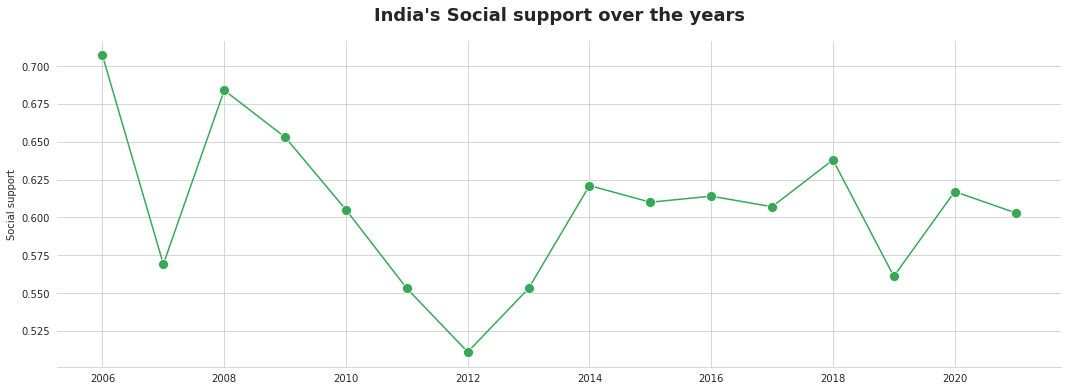

In [15]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Year', y='Social support', data=india, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('India\'s Social support over the years', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

A lot of variation in the social support over the years. There are some distinct lows in 2007, 2012 and 2019, 2012 being the lowest and some distinct highs in 2008, 2014 and 2018. India's social support is on a decreasing trend over the years.

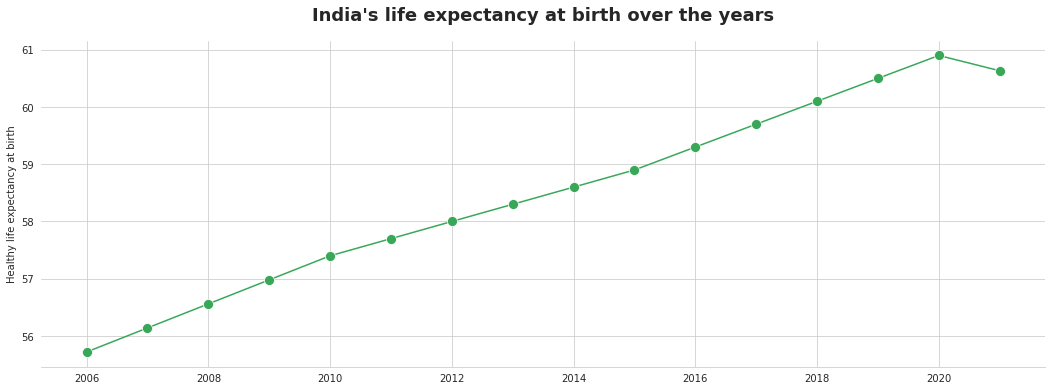

In [16]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Year', y='Healthy life expectancy at birth', data=india, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('India\'s life expectancy at birth over the years', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

An increasing trend over the years, with a light drop after 2020 here - but it's to be expected. Covid-19 had struck in 2020, and it would not be surprising that the life expectancy has slightly dropped.

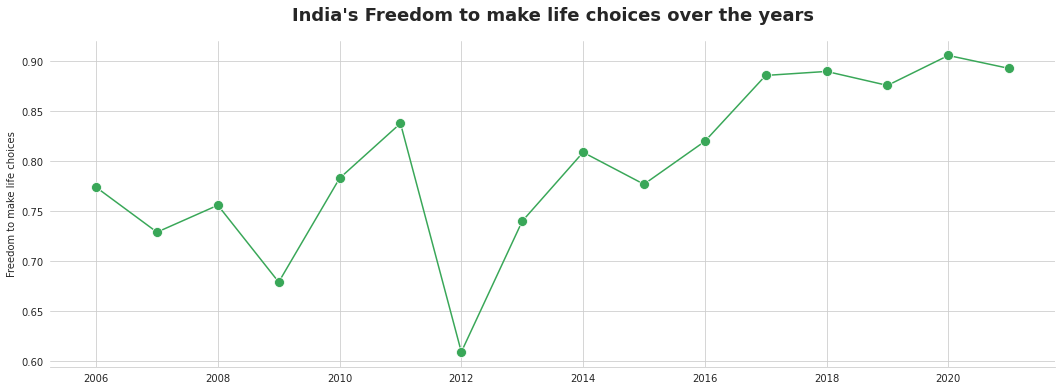

In [17]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Year', y='Freedom to make life choices', data=india, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('India\'s Freedom to make life choices over the years', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

There's a slight increasing trend, but there are distincts drops as seen in years 2008, 2012, 2015 and 2019. With an all time low in year 2012.

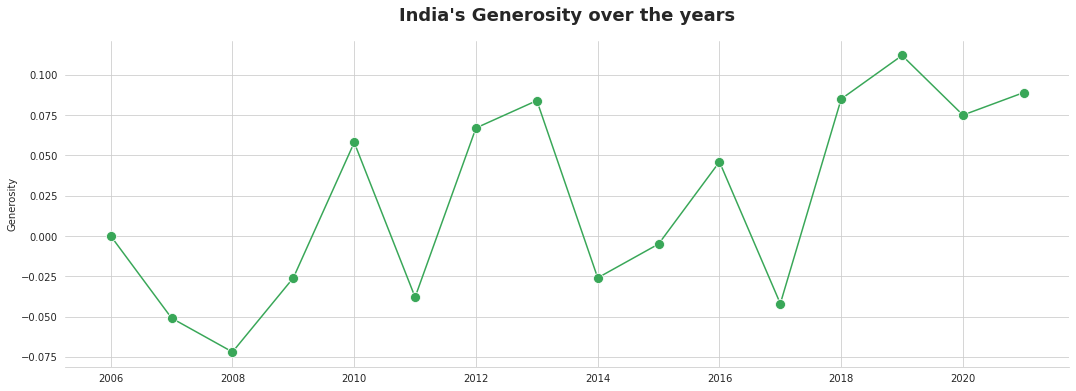

In [18]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Year', y='Generosity', data=india, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('India\'s Generosity over the years', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

Generosity amongst Indians have increased over time, with spikes in 2010, 2013, 2016 and 2019 and an all time low in 2011.


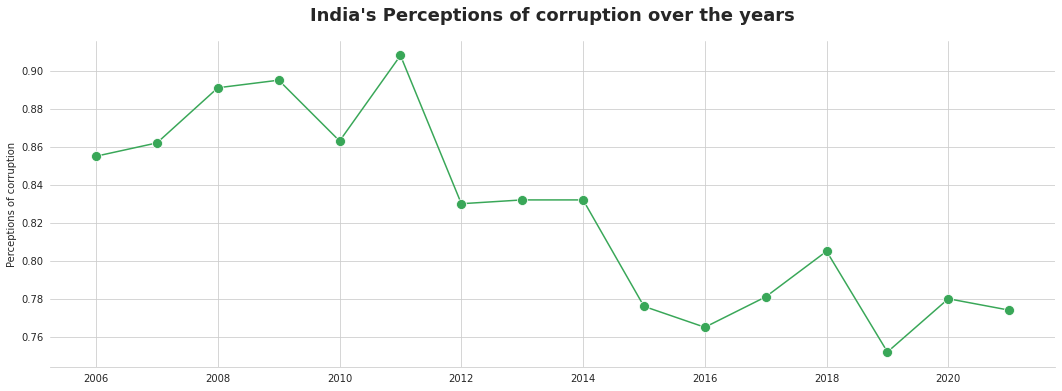

In [19]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Year', y='Perceptions of corruption', data=india, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('India\'s Perceptions of corruption over the years', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

There were peaks in 2011, 2014 and 2018, and the perception of corruption has decreased over the years.

# India and it's neighbors

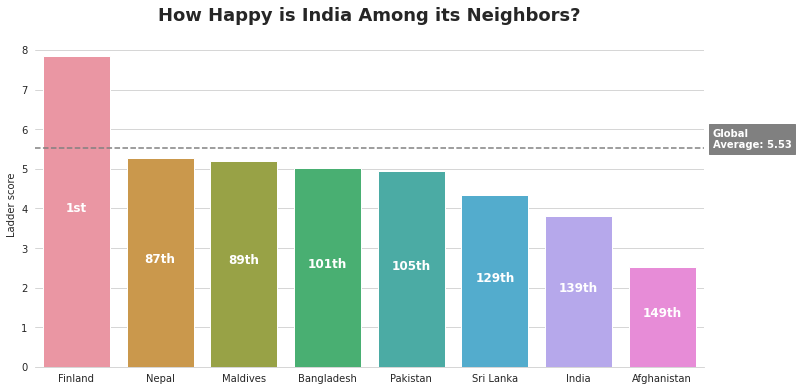

In [20]:
top = happiness_report[happiness_report['Country name'] == 'Finland']
south_asia = happiness_report[happiness_report['Regional indicator'] == 'South Asia']
top_bottom_neighbors = pd.concat([top, south_asia], axis=0)
top_bottom_neighbors['Rank'] = top_bottom_neighbors.index + 1
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop(['Regional indicator', 'Dystopia + residual', 'year'], axis=1, inplace=True)

df_glob = happiness_report.sort_values('Ladder score', ascending=False)[['Country name', 'Ladder score', 'Regional indicator']].reset_index(drop=True)
top = df_glob[df_glob['Ladder score'] == df_glob['Ladder score'].max()]
neighbors = df_glob[df_glob['Regional indicator'] == 'South Asia']
top_bottom_neighbors = pd.concat([top, neighbors], axis=0)
top_bottom_neighbors['Rank'] = list(top_bottom_neighbors.index + 1)
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop('Regional indicator', axis=1, inplace=True)

mean_score = happiness_report['Ladder score'].mean()
rank = list(top_bottom_neighbors['Rank'])
fig, ax = plt.subplots(figsize=(12, 6))
bar = sns.barplot(x='Country name', y='Ladder score', data=top_bottom_neighbors)
sns.set_style('whitegrid')
sns.despine(left=True)
for i in range(1, len(top_bottom_neighbors)):
    bar.text(x=i, y=(top_bottom_neighbors['Ladder score'][i])/2, s=str(rank[i])+'th',
            fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
bar.text(x=0, y=(top_bottom_neighbors['Ladder score'][0])/2, s=str(rank[0])+'st', fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
bar.axhline(mean_score, color='grey', linestyle='--')
bar.text(x=len(top_bottom_neighbors)-0.4, y = mean_score, s = 'Global\nAverage: {:.2f}'.format(mean_score),
        fontdict = dict(color='white', backgroundcolor='grey', fontsize=10, fontweight='bold'))
plt.title('How Happy is India Among its Neighbors?', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

Among south asian countries, India ranks 6th in the happiness index. In a world context, India ranks 139th, far below average. 

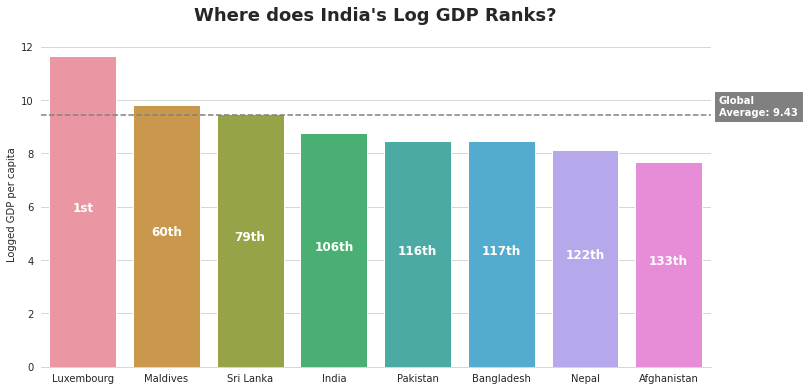

In [21]:
df_glob = happiness_report.sort_values('Logged GDP per capita', ascending=False)[['Country name', 'Logged GDP per capita', 'Regional indicator']].reset_index(drop=True)
top = df_glob[df_glob['Logged GDP per capita'] == df_glob['Logged GDP per capita'].max()]
neighbors = df_glob[df_glob['Regional indicator'] == 'South Asia']
top_bottom_neighbors = pd.concat([top, neighbors], axis=0)
top_bottom_neighbors['Rank'] = list(top_bottom_neighbors.index + 1)
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop('Regional indicator', axis=1, inplace=True)

mean_score = happiness_report['Logged GDP per capita'].mean()
rank = list(top_bottom_neighbors['Rank'])
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Country name', y='Logged GDP per capita', data=top_bottom_neighbors);
sns.set_style('whitegrid')
sns.despine(left=True)
for i in range(1, len(top_bottom_neighbors)):
    bar.text(x=i, y=(top_bottom_neighbors['Logged GDP per capita'][i])/2, s=str(rank[i])+'th',
            fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
bar.text(x=0, y=(top_bottom_neighbors['Logged GDP per capita'][0])/2, s=str(rank[0])+'st', fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
bar.axhline(mean_score, color='grey', linestyle='--')
bar.text(x=len(top_bottom_neighbors)-0.4, y = mean_score, s = 'Global\nAverage: {:.2f}'.format(mean_score),
        fontdict = dict(color='white', backgroundcolor='grey', fontsize=10, fontweight='bold'))
plt.title('Where does India\'s Log GDP Ranks?', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

Among south asian countries, India ranks 3rd in Log GDP per Capita scores. In a world context, India ranks 106th. 

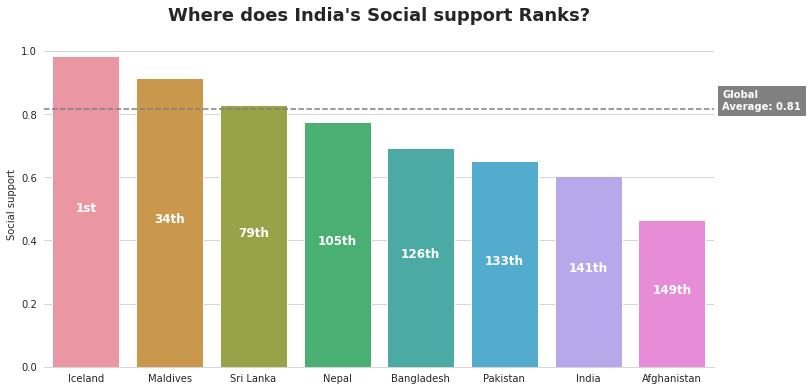

In [22]:
df_glob = happiness_report.sort_values('Social support', ascending=False)[['Country name', 'Social support', 'Regional indicator']].reset_index(drop=True)
top = df_glob[df_glob['Social support'] == df_glob['Social support'].max()]
top = top[top['Country name'] == 'Iceland']
neighbors = df_glob[df_glob['Regional indicator'] == 'South Asia']
top_bottom_neighbors = pd.concat([top, neighbors], axis=0)
top_bottom_neighbors['Rank'] = list(top_bottom_neighbors.index + 1)
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop('Regional indicator', axis=1, inplace=True)

mean_score = happiness_report['Social support'].mean()
rank = list(top_bottom_neighbors['Rank'])
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Country name', y='Social support', data=top_bottom_neighbors);
sns.set_style('whitegrid')
sns.despine(left=True)
for i in range(1, len(top_bottom_neighbors)):
    bar.text(x=i, y=(top_bottom_neighbors['Social support'][i])/2, s=str(rank[i])+'th',
            fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
bar.text(x=0, y=(top_bottom_neighbors['Social support'][0])/2, s=str(rank[0])+'st', fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
bar.axhline(mean_score, color='grey', linestyle='--')
bar.text(x=len(top_bottom_neighbors)-0.4, y = mean_score, s = 'Global\nAverage: {:.2f}'.format(mean_score),
        fontdict = dict(color='white', backgroundcolor='grey', fontsize=10, fontweight='bold'))
plt.title('Where does India\'s Social support Ranks?', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

Among south asian countries, India ranks 6th in Social support scores. In a world context, India ranks 141th

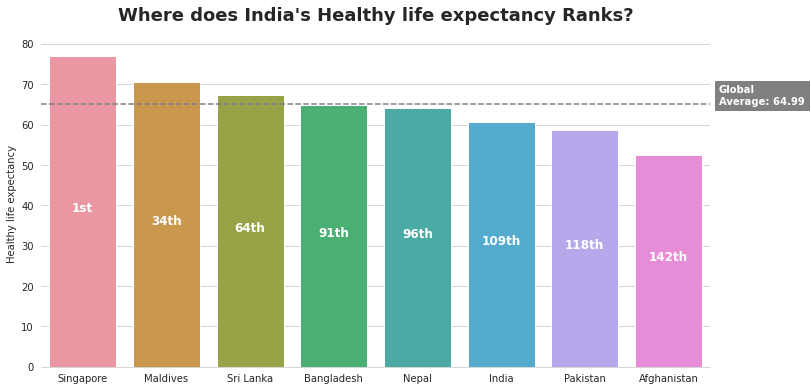

In [23]:
df_glob = happiness_report.sort_values('Healthy life expectancy', ascending=False)[['Country name', 'Healthy life expectancy', 'Regional indicator']].reset_index(drop=True)
top = df_glob[df_glob['Healthy life expectancy'] == df_glob['Healthy life expectancy'].max()]
neighbors = df_glob[df_glob['Regional indicator'] == 'South Asia']
top_bottom_neighbors = pd.concat([top, neighbors], axis=0)
top_bottom_neighbors['Rank'] = list(top_bottom_neighbors.index + 1)
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop('Regional indicator', axis=1, inplace=True)

mean_score = happiness_report['Healthy life expectancy'].mean()
rank = list(top_bottom_neighbors['Rank'])
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Country name', y='Healthy life expectancy', data=top_bottom_neighbors);
sns.set_style('whitegrid')
sns.despine(left=True)
for i in range(1, len(top_bottom_neighbors)):
    bar.text(x=i, y=(top_bottom_neighbors['Healthy life expectancy'][i])/2, s=str(rank[i])+'th',
            fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
bar.text(x=0, y=(top_bottom_neighbors['Healthy life expectancy'][0])/2, s=str(rank[0])+'st', fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
bar.axhline(mean_score, color='grey', linestyle='--')
bar.text(x=len(top_bottom_neighbors)-0.4, y = mean_score, s = 'Global\nAverage: {:.2f}'.format(mean_score),
        fontdict = dict(color='white', backgroundcolor='grey', fontsize=10, fontweight='bold'))
plt.title('Where does India\'s Healthy life expectancy Ranks?', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

Among south asian countries, India ranks 5th in Healthy life expectancy scores. In a world context, India ranks 103th.

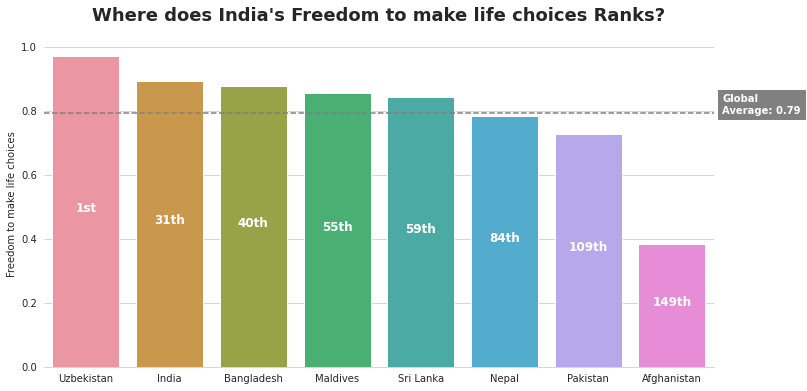

In [24]:
df_glob = happiness_report.sort_values('Freedom to make life choices', ascending=False)[['Country name', 'Freedom to make life choices', 'Regional indicator']].reset_index(drop=True)
top = df_glob[df_glob['Freedom to make life choices'] == df_glob['Freedom to make life choices'].max()]
neighbors = df_glob[df_glob['Regional indicator'] == 'South Asia']
top_bottom_neighbors = pd.concat([top, neighbors], axis=0)
top_bottom_neighbors['Rank'] = list(top_bottom_neighbors.index + 1)
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop('Regional indicator', axis=1, inplace=True)

mean_score = happiness_report['Freedom to make life choices'].mean()
rank = list(top_bottom_neighbors['Rank'])
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Country name', y='Freedom to make life choices', data=top_bottom_neighbors);
sns.set_style('whitegrid')
sns.despine(left=True)
for i in range(1, len(top_bottom_neighbors)):
    bar.text(x=i, y=(top_bottom_neighbors['Freedom to make life choices'][i])/2, s=str(rank[i])+'th',
            fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
bar.text(x=0, y=(top_bottom_neighbors['Freedom to make life choices'][0])/2, s=str(rank[0])+'st', fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
bar.axhline(mean_score, color='grey', linestyle='--')
bar.text(x=len(top_bottom_neighbors)-0.4, y = mean_score, s = 'Global\nAverage: {:.2f}'.format(mean_score),
        fontdict = dict(color='white', backgroundcolor='grey', fontsize=10, fontweight='bold'))
plt.title('Where does India\'s Freedom to make life choices Ranks?', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

Among south asian countries, India ranks 1st in Freedom to make life choices scores. In a world context, India ranks 31st.

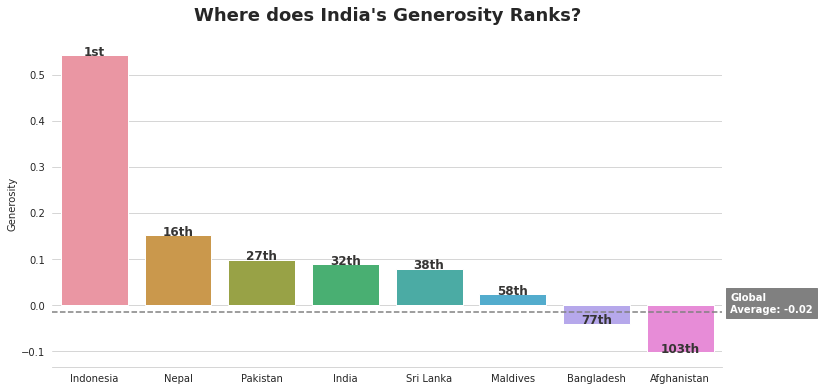

In [25]:
df_glob = happiness_report.sort_values('Generosity', ascending=False)[['Country name', 'Generosity', 'Regional indicator']].reset_index(drop=True)
top = df_glob[df_glob['Generosity'] == df_glob['Generosity'].max()]
neighbors = df_glob[df_glob['Regional indicator'] == 'South Asia']
top_bottom_neighbors = pd.concat([top, neighbors], axis=0)
top_bottom_neighbors['Rank'] = list(top_bottom_neighbors.index + 1)
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop('Regional indicator', axis=1, inplace=True)

mean_score = happiness_report['Generosity'].mean()
rank = list(top_bottom_neighbors['Rank'])
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Country name', y='Generosity', data=top_bottom_neighbors);
sns.set_style('whitegrid')
sns.despine(left=True)
for i in range(1, len(top_bottom_neighbors)):
    bar.text(x=i, y=top_bottom_neighbors['Generosity'][i], s=str(rank[i])+'th',
            fontdict=dict(color='#363534', fontsize=12, fontweight='bold', horizontalalignment='center'))
bar.text(x=0, y=top_bottom_neighbors['Generosity'][0], s=str(rank[0])+'st', fontdict=dict(color='#363534', fontsize=12, fontweight='bold', horizontalalignment='center'))
bar.axhline(mean_score, color='grey', linestyle='--')
bar.text(x=len(top_bottom_neighbors)-0.4, y = mean_score, s = 'Global\nAverage: {:.2f}'.format(mean_score),
        fontdict = dict(color='white', backgroundcolor='grey', fontsize=10, fontweight='bold'))
plt.title('Where does India\'s Generosity Ranks?', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

Among south asian countries, India ranks 3rd in Generosity scores. In a world context, India ranks 32nd.

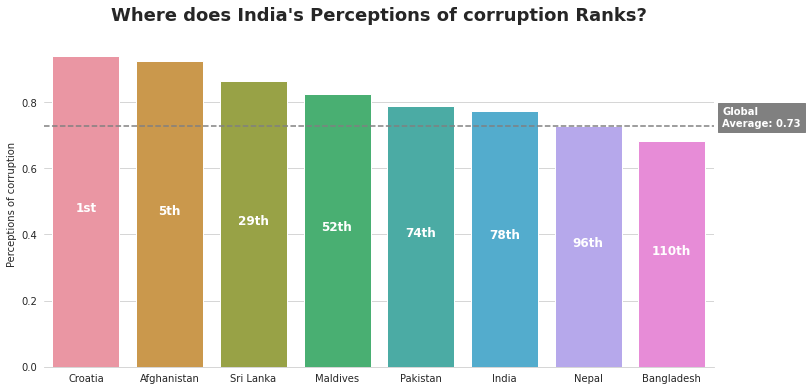

In [26]:
df_glob = happiness_report.sort_values('Perceptions of corruption', ascending=False)[['Country name', 'Perceptions of corruption', 'Regional indicator']].reset_index(drop=True)
top = df_glob[df_glob['Perceptions of corruption'] == df_glob['Perceptions of corruption'].max()]
neighbors = df_glob[df_glob['Regional indicator'] == 'South Asia']
top_bottom_neighbors = pd.concat([top, neighbors], axis=0)
top_bottom_neighbors['Rank'] = list(top_bottom_neighbors.index + 1)
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop('Regional indicator', axis=1, inplace=True)

mean_score = happiness_report['Perceptions of corruption'].mean()
rank = list(top_bottom_neighbors['Rank'])
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Country name', y='Perceptions of corruption', data=top_bottom_neighbors);
sns.set_style('whitegrid')
sns.despine(left=True)
for i in range(1, len(top_bottom_neighbors)):
    bar.text(x=i, y=(top_bottom_neighbors['Perceptions of corruption'][i])/2, s=str(rank[i])+'th',
            fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
bar.text(x=0, y=(top_bottom_neighbors['Perceptions of corruption'][0])/2, s=str(rank[0])+'st', fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
bar.axhline(mean_score, color='grey', linestyle='--')
bar.text(x=len(top_bottom_neighbors)-0.4, y = mean_score, s = 'Global\nAverage: {:.2f}'.format(mean_score),
        fontdict = dict(color='white', backgroundcolor='grey', fontsize=10, fontweight='bold'))
plt.title('Where does India\'s Perceptions of corruption Ranks?', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

Among south asian countries, India ranks 5th in Perceptions of corruption scores. In a world context, India ranks 78th.

# Scores Components Breakdown

In [27]:
sa = happiness[happiness['Regional indicator'] == 'South Asia']
sa.drop(['Regional indicator', 'Ladder score', 
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia', 'Dystopia + residual'], axis=1, inplace=True)

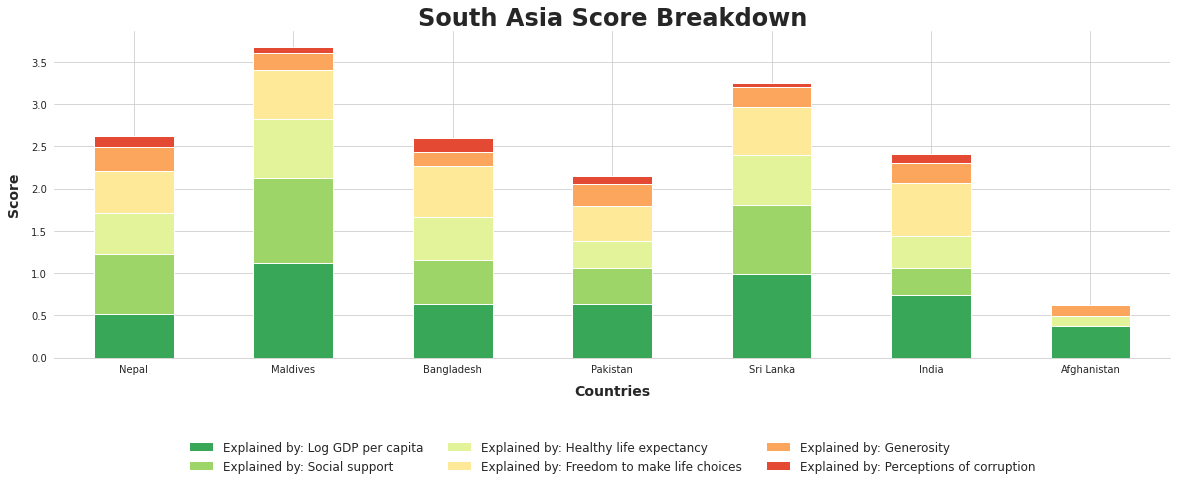

In [28]:
sa.plot(kind='bar', stacked=True, figsize=(20, 6));
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, borderpad=1, frameon=False, fontsize=12)
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Nepal', 'Maldives', 'Bangladesh', 'Pakistan', 'Sri Lanka',
       'India', 'Afghanistan'], rotation=0);
plt.ylabel("Score", fontsize=14, fontweight='bold', labelpad=10)
plt.xlabel("Countries", fontsize=14, fontweight='bold', labelpad=10)
plt.title('South Asia Score Breakdown', fontsize=24, fontweight='bold')
sns.despine(left=True)

GDP per capita seems to play a big role in the improvement in happiness score as the most happy countries in south asia like Maldives and Sri Lanka has a high log GDP per capita. The most unhappy contry have low GDP. The most countries in south asia also have a low corruption.

# India's Score Components Breakdown

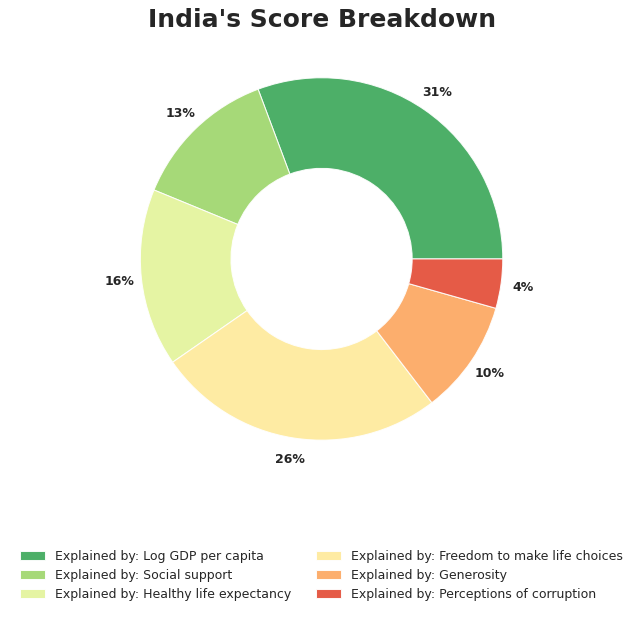

In [29]:
sa.set_index('Country name', inplace=True)
ind = sa.loc['India']

fig, ax = plt.subplots(figsize=(14, 8), dpi=75)
pie = ax.pie(
    ind, 
    wedgeprops=dict(width=0.5, alpha=0.9),
    autopct='%1.0f%%',
    pctdistance=1.12, 
    textprops={
        'fontsize': 12, 
        'fontweight': 'bold'
    }, 
)
ax.legend(ind.index, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, borderpad=1, frameon=False, fontsize=12)
plt.title('India\'s Score Breakdown', fontsize=24, fontweight='bold')
plt.show()

The lowest contribution to India's score is of perception of corruption only 4%. The highest contribution is of log GDP per capita followed by freedom to make life choices and healthy life expectancy.